In [5]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.preprocessing import LabelEncoder

In [6]:

parent_folder = '../wbc_dataset/'

X = []
y = []
cnt=1

# Get a list of subdirectories (folders) in the parent directory
subdirectories = [f for f in os.listdir(parent_folder) if os.path.isdir(os.path.join(parent_folder, f))]
print(subdirectories)
# Define parameters for noise removal and smoothing
kernel_size = 5
sigma = 1


['TR02', 'TR03', 'TR10', 'TR21', 'TR36', 'TR39', 'TR44']


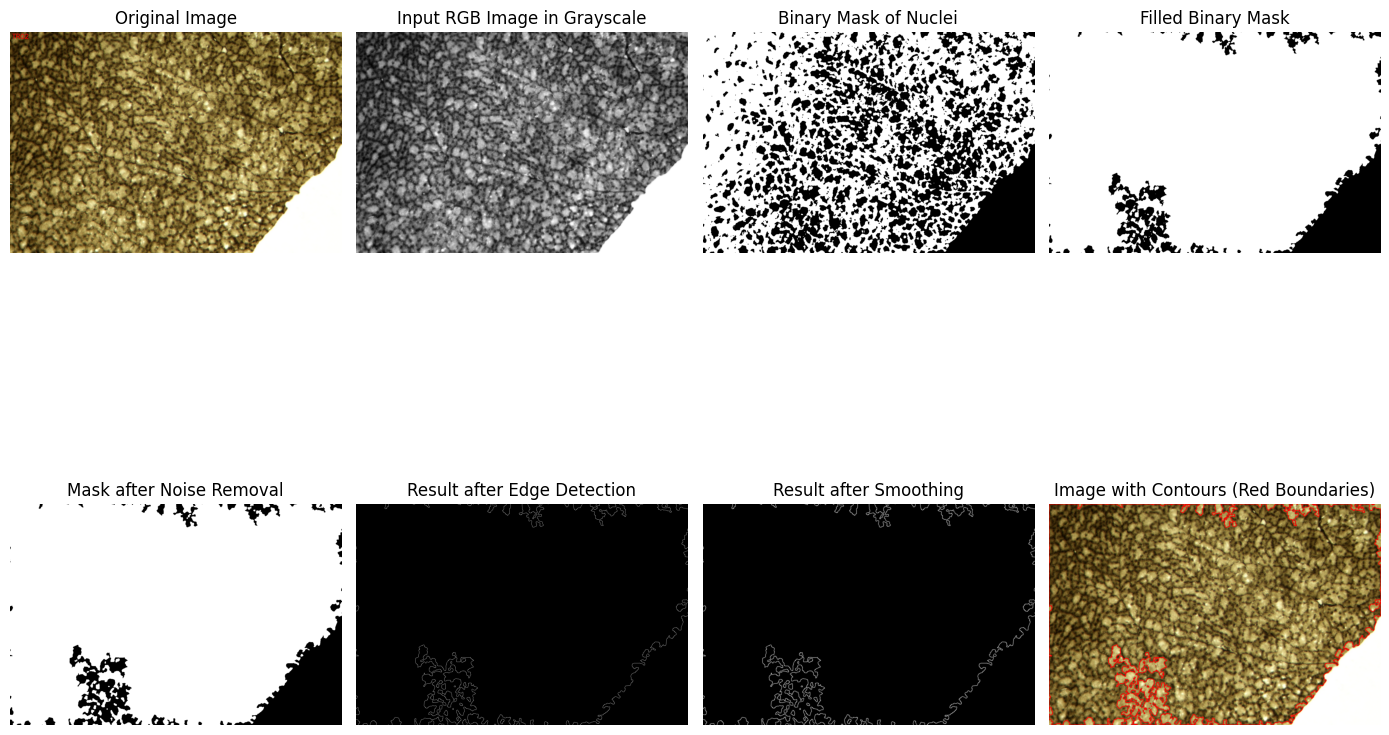

In [7]:

# Loop through each subdirectory
for subdirectory in subdirectories:
    folder_path = os.path.join(parent_folder, subdirectory)
    
    # List all files in the folder
    files = os.listdir(folder_path)

    # Filter out only image files
    image_files = [f for f in files if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp'))]

    # Loop through each image file
    for image_file in image_files:
        # Read the image
        image_path = os.path.join(folder_path, image_file)
        image = cv2.imread(image_path)

        # Annotate the image with folder name
        annotated_image = image.copy()
        cv2.putText(annotated_image, subdirectory, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

   
        # Convert the image to grayscale
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        # Apply thresholding to segment the cells (Step (b))
        _, threshold_image = cv2.threshold(gray_image, 120, 255, cv2.THRESH_BINARY_INV)

        # Find contours
        contours, _ = cv2.findContours(threshold_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        # Draw contours on the original image
        contour_image = np.copy(image)
        cv2.drawContours(contour_image, contours, -1, (0, 0, 255), 2)

        # Step (c): Filled binary mask
        filled_mask = threshold_image.copy()
        cv2.fillPoly(filled_mask, contours, (255, 255, 255))  # Fill contours

        # Step (d): Mask after noise removal
        noise_removal_kernel = np.ones((kernel_size, kernel_size), np.uint8)
        noise_removal_mask = cv2.morphologyEx(filled_mask, cv2.MORPH_OPEN, noise_removal_kernel)

        # Step (e): Result after edge detection
        edge_detected_mask = cv2.Canny(noise_removal_mask, 100, 200)

        # Step (f): Result after smoothing
        smoothed_mask = cv2.GaussianBlur(edge_detected_mask, (kernel_size, kernel_size), sigma)
        X.append(edge_detected_mask)
        y.append(subdirectory)

        if cnt==1:
            # Plot all images in a single figure
            plt.figure(figsize=(14, 12))

            
            plt.subplot(2, 4, 1)
            
            plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
            plt.title('Original Image')
            plt.axis('off')

            plt.subplot(2, 4, 2)
            plt.imshow(gray_image, cmap='gray')
            plt.title('Input RGB Image in Grayscale')
            plt.axis('off')

            plt.subplot(2, 4, 3)
            plt.imshow(threshold_image, cmap='gray')
            plt.title('Binary Mask of Nuclei')
            plt.axis('off')

            plt.subplot(2, 4, 4)
            plt.imshow(filled_mask, cmap='gray')
            plt.title('Filled Binary Mask')
            plt.axis('off')

            plt.subplot(2, 4, 5)
            plt.imshow(noise_removal_mask, cmap='gray')
            plt.title('Mask after Noise Removal')
            plt.axis('off')

            plt.subplot(2, 4, 6)
            plt.imshow(edge_detected_mask, cmap='gray')
            plt.title('Result after Edge Detection')
            plt.axis('off')

            plt.subplot(2, 4, 7)
            plt.imshow(smoothed_mask, cmap='gray')
            plt.title('Result after Smoothing')
            plt.axis('off')

            plt.subplot(2, 4, 8)
            plt.imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))
            plt.title('Image with Contours (Red Boundaries)')
            plt.axis('off')

        
        

            plt.tight_layout()
            plt.show()
        cnt+=1


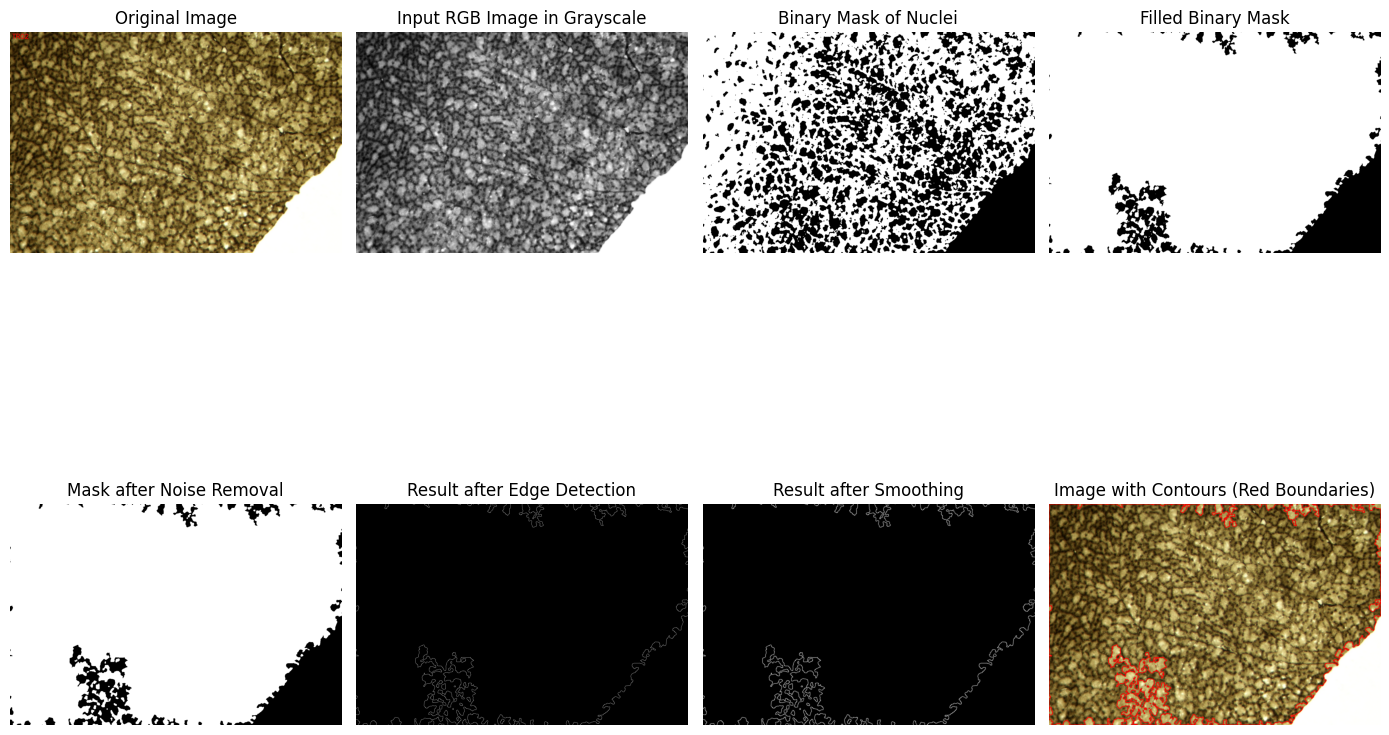

In [4]:

# Loop through each subdirectory
for subdirectory in subdirectories:
    folder_path = os.path.join(parent_folder, subdirectory)
    
    # List all files in the folder
    files = os.listdir(folder_path)

    # Filter out only image files
    image_files = [f for f in files if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp'))]

    # Loop through each image file
    for image_file in image_files:
        # Read the image
        image_path = os.path.join(folder_path, image_file)
        image = cv2.imread(image_path)

        # Annotate the image with folder name
        annotated_image = image.copy()
        cv2.putText(annotated_image, subdirectory, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

   
        # Convert the image to grayscale
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        # Apply thresholding to segment the cells (Step (b))
        _, threshold_image = cv2.threshold(gray_image, 120, 255, cv2.THRESH_BINARY_INV)

        # Find contours
        contours, _ = cv2.findContours(threshold_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        # Draw contours on the original image
        contour_image = np.copy(image)
        cv2.drawContours(contour_image, contours, -1, (0, 0, 255), 2)

        # Step (c): Filled binary mask
        filled_mask = threshold_image.copy()
        cv2.fillPoly(filled_mask, contours, (255, 255, 255))  # Fill contours

        # Step (d): Mask after noise removal
        noise_removal_kernel = np.ones((kernel_size, kernel_size), np.uint8)
        noise_removal_mask = cv2.morphologyEx(filled_mask, cv2.MORPH_OPEN, noise_removal_kernel)

        # Step (e): Result after edge detection
        edge_detected_mask = cv2.Canny(noise_removal_mask, 100, 200)

        # Step (f): Result after smoothing
        smoothed_mask = cv2.GaussianBlur(edge_detected_mask, (kernel_size, kernel_size), sigma)
        X.append(edge_detected_mask)
        y.append(subdirectory)

        if cnt==1:
            # Plot all images in a single figure
            plt.figure(figsize=(14, 12))

            
            plt.subplot(2, 4, 1)
            
            plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
            plt.title('Original Image')
            plt.axis('off')

            plt.subplot(2, 4, 2)
            plt.imshow(gray_image, cmap='gray')
            plt.title('Input RGB Image in Grayscale')
            plt.axis('off')

            plt.subplot(2, 4, 3)
            plt.imshow(threshold_image, cmap='gray')
            plt.title('Binary Mask of Nuclei')
            plt.axis('off')

            plt.subplot(2, 4, 4)
            plt.imshow(filled_mask, cmap='gray')
            plt.title('Filled Binary Mask')
            plt.axis('off')

            plt.subplot(2, 4, 5)
            plt.imshow(noise_removal_mask, cmap='gray')
            plt.title('Mask after Noise Removal')
            plt.axis('off')

            plt.subplot(2, 4, 6)
            plt.imshow(edge_detected_mask, cmap='gray')
            plt.title('Result after Edge Detection')
            plt.axis('off')

            plt.subplot(2, 4, 7)
            plt.imshow(smoothed_mask, cmap='gray')
            plt.title('Result after Smoothing')
            plt.axis('off')

            plt.subplot(2, 4, 8)
            plt.imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))
            plt.title('Image with Contours (Red Boundaries)')
            plt.axis('off')

        
        

            plt.tight_layout()
            plt.show()
        cnt+=1


In [9]:
X = np.array(X)
y = np.array(y)

# Convert labels to numeric values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)


In [10]:
plt.savefig("code1.png")

<Figure size 640x480 with 0 Axes>

In [11]:

# Split dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train.reshape(-1, 1024, 1536, 1)
X_val = X_val.reshape(-1, 1024, 1536, 1)


In [12]:

# Define CNN architecture
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(1024, 1536, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(len(subdirectories), activation='softmax'))
 

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


model.summary()

print(model.summary)




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 1022, 1534, 32)    320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 511, 767, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 509, 765, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 254, 382, 64)      0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 6209792)           0         
                                                                 
 dense (Dense)               (None, 128)             

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\layer_utils.py:146: RuntimeWarning: overflow encountered in long_scalars
  total_memory_size += weight_shape * per_param_size


In [13]:
# Define callbacks (e.g., save best model, early stopping)
checkpoint = ModelCheckpoint("best_model.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=2, batch_size=16, validation_data=(X_val, y_val))#, callbacks=[checkpoint, early_stopping])

# Evaluate the model
loss, accuracy = model.evaluate(X_val, y_val)
print("Validation Loss:", loss)
print("Validation Accuracy:", accuracy)

# Plot accuracy, overfitting, and underfitting graphs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epoch')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs. Epoch')
plt.legend()
plt.show()

Epoch 1/2


 1/13 [=>............................] - ETA: 1:14:35 - loss: 12.3219 - accuracy: 0.1250